In [111]:
# importing necessary modules
import numpy as np 
import pandas as pd 

In [112]:
# Reading csv file
data=pd.read_csv("data.csv")
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [113]:
data.shape


(500, 13)

In [114]:
data.tail()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
495,LP002586,Female,Yes,1,Graduate,No,3326,913.0,105.0,84.0,1.0,Semiurban,Y
496,LP002587,Male,Yes,0,Not Graduate,No,2600,1700.0,107.0,360.0,1.0,Rural,Y
497,LP002588,Male,Yes,0,Graduate,No,4625,2857.0,111.0,12.0,NaN,Urban,Y
498,LP002600,Male,Yes,1,Graduate,Yes,2895,0.0,95.0,360.0,1.0,Semiurban,Y
499,LP002602,Male,No,0,Graduate,No,6283,4416.0,209.0,360.0,0.0,Rural,N


In [115]:
# Removing unncessary columns from dataset 
data=data.drop(["Loan_ID"],axis=1)

In [116]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             491 non-null    object 
 1   Married            497 non-null    object 
 2   Dependents         488 non-null    object 
 3   Education          500 non-null    object 
 4   Self_Employed      473 non-null    object 
 5   ApplicantIncome    500 non-null    int64  
 6   CoapplicantIncome  500 non-null    float64
 7   LoanAmount         482 non-null    float64
 8   Loan_Amount_Term   486 non-null    float64
 9   Credit_History     459 non-null    float64
 10  Property_Area      500 non-null    object 
 11  Loan_Status        500 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 47.0+ KB


In [117]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [118]:
#removing + sign from dependents column
data['Dependents']=data['Dependents'].str.replace('+','')

<ipython-input-118-34ea103f2d2e>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['Dependents']=data['Dependents'].str.replace('+','')


In [119]:
data["Dependents"]=data["Dependents"].apply(pd.to_numeric)

In [120]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             491 non-null    object 
 1   Married            497 non-null    object 
 2   Dependents         488 non-null    float64
 3   Education          500 non-null    object 
 4   Self_Employed      473 non-null    object 
 5   ApplicantIncome    500 non-null    int64  
 6   CoapplicantIncome  500 non-null    float64
 7   LoanAmount         482 non-null    float64
 8   Loan_Amount_Term   486 non-null    float64
 9   Credit_History     459 non-null    float64
 10  Property_Area      500 non-null    object 
 11  Loan_Status        500 non-null    object 
dtypes: float64(5), int64(1), object(6)
memory usage: 47.0+ KB


In [121]:
# Dependents col is now converted into numeric type
# our data set contains null values 

In [122]:
# To see no of missing values for each attribute
data.isnull().sum()

Gender                9
Married               3
Dependents           12
Education             0
Self_Employed        27
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           18
Loan_Amount_Term     14
Credit_History       41
Property_Area         0
Loan_Status           0
dtype: int64

In [123]:
total_null = data.isnull().sum().sort_values(ascending=False) 
#First sum and order all null values for each variable
percentage = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False) 
#Get the percentage
missing_data = pd.concat([total_null, percentage], axis=1, keys=['Total', 'Percentage'])
missing_data.head()


,Total,Percentage
Credit_History,41,0.082
Self_Employed,27,0.054
LoanAmount,18,0.036
Loan_Amount_Term,14,0.028
Dependents,12,0.024


In [124]:
# For getting numeric cols 
num_col=data._get_numeric_data().columns.tolist()

In [125]:
num_col

['Dependents',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [126]:
# For getting categorical values
cat_col=set(data.columns)-set(num_col)
cat_col

{'Education',
 'Gender',
 'Loan_Status',
 'Married',
 'Property_Area',
 'Self_Employed'}

In [127]:
# Filling numerical missing values with mean values
for col in num_col:
    data[col].fillna(data[col].mean(),inplace=True)

In [128]:
data.isnull().sum()

Gender                9
Married               3
Dependents            0
Education             0
Self_Employed        27
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [129]:
# Now the numeric missing numeric values has been filled 

In [130]:
data['Married'].value_counts(dropna=False)

Yes    322
No     175
NaN      3
Name: Married, dtype: int64

In [131]:
data['Dependents'].value_counts(dropna=False)

0.000000    288
1.000000     81
2.000000     79
3.000000     40
0.735656     12
Name: Dependents, dtype: int64

In [132]:
data['Education'].value_counts(dropna=False)

Graduate        393
Not Graduate    107
Name: Education, dtype: int64

In [133]:
data['Self_Employed'].value_counts(dropna=False)

No     407
Yes     66
NaN     27
Name: Self_Employed, dtype: int64

In [134]:
data['ApplicantIncome'].value_counts(dropna=False)

2500     8
2600     6
6000     5
4583     5
4166     5
        ..
3522     1
51763    1
8000     1
2237     1
6283     1
Name: ApplicantIncome, Length: 415, dtype: int64

In [135]:
data['Credit_History'].value_counts(dropna=False)

1.000000    387
0.000000     72
0.843137     41
Name: Credit_History, dtype: int64

In [136]:
data['Property_Area'].value_counts(dropna=False)

Semiurban    188
Urban        171
Rural        141
Name: Property_Area, dtype: int64

In [137]:
data['Loan_Status'].value_counts(dropna=False)

Y    345
N    155
Name: Loan_Status, dtype: int64

In [138]:
data['LoanAmount'].value_counts(dropna=False)

120.000000    19
144.020747    18
160.000000    12
110.000000    12
100.000000    11
              ..
58.000000      1
260.000000     1
73.000000      1
495.000000     1
209.000000     1
Name: LoanAmount, Length: 180, dtype: int64

In [139]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             491 non-null    object 
 1   Married            497 non-null    object 
 2   Dependents         500 non-null    float64
 3   Education          500 non-null    object 
 4   Self_Employed      473 non-null    object 
 5   ApplicantIncome    500 non-null    int64  
 6   CoapplicantIncome  500 non-null    float64
 7   LoanAmount         500 non-null    float64
 8   Loan_Amount_Term   500 non-null    float64
 9   Credit_History     500 non-null    float64
 10  Property_Area      500 non-null    object 
 11  Loan_Status        500 non-null    object 
dtypes: float64(5), int64(1), object(6)
memory usage: 47.0+ KB


In [140]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             491 non-null    object 
 1   Married            497 non-null    object 
 2   Dependents         500 non-null    float64
 3   Education          500 non-null    object 
 4   Self_Employed      473 non-null    object 
 5   ApplicantIncome    500 non-null    int64  
 6   CoapplicantIncome  500 non-null    float64
 7   LoanAmount         500 non-null    float64
 8   Loan_Amount_Term   500 non-null    float64
 9   Credit_History     500 non-null    float64
 10  Property_Area      500 non-null    object 
 11  Loan_Status        500 non-null    object 
dtypes: float64(5), int64(1), object(6)
memory usage: 47.0+ KB


In [141]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0.0,Graduate,No,5849,0.0,144.020747,360.0,1.0,Urban,Y
1,Male,Yes,1.0,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0.0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [142]:
# converting float to int for dependents attribute
data['Dependents'] = (data['Dependents']).astype(int)

In [143]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             491 non-null    object 
 1   Married            497 non-null    object 
 2   Dependents         500 non-null    int32  
 3   Education          500 non-null    object 
 4   Self_Employed      473 non-null    object 
 5   ApplicantIncome    500 non-null    int64  
 6   CoapplicantIncome  500 non-null    float64
 7   LoanAmount         500 non-null    float64
 8   Loan_Amount_Term   500 non-null    float64
 9   Credit_History     500 non-null    float64
 10  Property_Area      500 non-null    object 
 11  Loan_Status        500 non-null    object 
dtypes: float64(4), int32(1), int64(1), object(6)
memory usage: 45.0+ KB


In [144]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,144.020747,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [145]:
# converting categorical data into int values 
property_type = {'Urban': 1,'Semiurban': 2,'Rural':3}
data.Property_Area = [property_type[item] for item in data.Property_Area]

In [146]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,144.020747,360.0,1.0,1,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,3,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,1,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,1,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,1,Y


In [147]:
loan_approval_status = {'Y': 1,'N':0}
data.Loan_Status = [loan_approval_status[item] for item in data.Loan_Status]

In [148]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,144.020747,360.0,1.0,1,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,3,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,1,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,1,1
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,1,1


In [149]:
data['Credit_History'] = (data['Credit_History']).astype(int)

In [150]:
data['Loan_Amount_Term'] = (data['Loan_Amount_Term']).astype(int)
data['Credit_History'] = (data['Credit_History']).astype(int)
data['CoapplicantIncome'] = (data['CoapplicantIncome']).astype(int)
data['ApplicantIncome'] = (data['ApplicantIncome']).astype(int)


In [151]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0,144.020747,360,1,1,1
1,Male,Yes,1,Graduate,No,4583,1508,128.000000,360,1,3,0
2,Male,Yes,0,Graduate,Yes,3000,0,66.000000,360,1,1,1
3,Male,Yes,0,Not Graduate,No,2583,2358,120.000000,360,1,1,1
4,Male,No,0,Graduate,No,6000,0,141.000000,360,1,1,1


In [152]:
data['LoanAmount'] = (data['LoanAmount']).astype(int)

In [153]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0,144,360,1,1,1
1,Male,Yes,1,Graduate,No,4583,1508,128,360,1,3,0
2,Male,Yes,0,Graduate,Yes,3000,0,66,360,1,1,1
3,Male,Yes,0,Not Graduate,No,2583,2358,120,360,1,1,1
4,Male,No,0,Graduate,No,6000,0,141,360,1,1,1


In [154]:
data['Education'].value_counts(dropna=False)

Graduate        393
Not Graduate    107
Name: Education, dtype: int64

In [155]:
education_level = {'Graduate': 1,'Not Graduate':0}
data.Education = [education_level[item] for item in data.Education]

In [156]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,1,No,5849,0,144,360,1,1,1
1,Male,Yes,1,1,No,4583,1508,128,360,1,3,0
2,Male,Yes,0,1,Yes,3000,0,66,360,1,1,1
3,Male,Yes,0,0,No,2583,2358,120,360,1,1,1
4,Male,No,0,1,No,6000,0,141,360,1,1,1


In [157]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Gender             491 non-null    object
 1   Married            497 non-null    object
 2   Dependents         500 non-null    int32 
 3   Education          500 non-null    int64 
 4   Self_Employed      473 non-null    object
 5   ApplicantIncome    500 non-null    int32 
 6   CoapplicantIncome  500 non-null    int32 
 7   LoanAmount         500 non-null    int32 
 8   Loan_Amount_Term   500 non-null    int32 
 9   Credit_History     500 non-null    int32 
 10  Property_Area      500 non-null    int64 
 11  Loan_Status        500 non-null    int64 
dtypes: int32(6), int64(3), object(3)
memory usage: 35.3+ KB


In [158]:
new_data = data.fillna(value=0)

In [159]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,1,No,5849,0,144,360,1,1,1
1,Male,Yes,1,1,No,4583,1508,128,360,1,3,0
2,Male,Yes,0,1,Yes,3000,0,66,360,1,1,1
3,Male,Yes,0,0,No,2583,2358,120,360,1,1,1
4,Male,No,0,1,No,6000,0,141,360,1,1,1


In [160]:
data.isnull()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
495,False,False,False,False,False,False,False,False,False,False,False,False
496,False,False,False,False,False,False,False,False,False,False,False,False
497,False,False,False,False,False,False,False,False,False,False,False,False
498,False,False,False,False,False,False,False,False,False,False,False,False


In [161]:
data.isnull().sum()

Gender                9
Married               3
Dependents            0
Education             0
Self_Employed        27
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [162]:
new_data.isnull()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
495,False,False,False,False,False,False,False,False,False,False,False,False
496,False,False,False,False,False,False,False,False,False,False,False,False
497,False,False,False,False,False,False,False,False,False,False,False,False
498,False,False,False,False,False,False,False,False,False,False,False,False


In [163]:
new_data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [164]:
new_data = data.fillna({'Gender' : 1})

In [165]:
new_data.isnull().sum()

Gender                0
Married               3
Dependents            0
Education             0
Self_Employed        27
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [166]:
new_data = data.fillna(method = 'bfill')

In [167]:
new_data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [168]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Gender             500 non-null    object
 1   Married            500 non-null    object
 2   Dependents         500 non-null    int32 
 3   Education          500 non-null    int64 
 4   Self_Employed      500 non-null    object
 5   ApplicantIncome    500 non-null    int32 
 6   CoapplicantIncome  500 non-null    int32 
 7   LoanAmount         500 non-null    int32 
 8   Loan_Amount_Term   500 non-null    int32 
 9   Credit_History     500 non-null    int32 
 10  Property_Area      500 non-null    int64 
 11  Loan_Status        500 non-null    int64 
dtypes: int32(6), int64(3), object(3)
memory usage: 35.3+ KB


In [169]:
new_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,1,No,5849,0,144,360,1,1,1
1,Male,Yes,1,1,No,4583,1508,128,360,1,3,0
2,Male,Yes,0,1,Yes,3000,0,66,360,1,1,1
3,Male,Yes,0,0,No,2583,2358,120,360,1,1,1
4,Male,No,0,1,No,6000,0,141,360,1,1,1


In [170]:
gender = {'Male': 1,'Female':0}
new_data.Gender = [gender[item] for item in new_data.Gender]

In [171]:
new_data['Gender'] = (new_data['Gender']).astype(int)

In [172]:
new_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,No,0,1,No,5849,0,144,360,1,1,1
1,1,Yes,1,1,No,4583,1508,128,360,1,3,0
2,1,Yes,0,1,Yes,3000,0,66,360,1,1,1
3,1,Yes,0,0,No,2583,2358,120,360,1,1,1
4,1,No,0,1,No,6000,0,141,360,1,1,1


In [173]:
new_data.tail()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
495,0,Yes,1,1,No,3326,913,105,84,1,2,1
496,1,Yes,0,0,No,2600,1700,107,360,1,3,1
497,1,Yes,0,1,No,4625,2857,111,12,0,1,1
498,1,Yes,1,1,Yes,2895,0,95,360,1,2,1
499,1,No,0,1,No,6283,4416,209,360,0,3,0


In [174]:
marital_status = {'Yes': 1,'No':0}
new_data.Married = [marital_status[item] for item in new_data.Married]

In [175]:
self_employed_or_not = {'Yes' : 1,'No':0}
new_data.Self_Employed = [self_employed_or_not[item] for item in new_data.Self_Employed]

In [176]:
new_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,0,5849,0,144,360,1,1,1
1,1,1,1,1,0,4583,1508,128,360,1,3,0
2,1,1,0,1,1,3000,0,66,360,1,1,1
3,1,1,0,0,0,2583,2358,120,360,1,1,1
4,1,0,0,1,0,6000,0,141,360,1,1,1


In [177]:
data = new_data

In [178]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,0,5849,0,144,360,1,1,1
1,1,1,1,1,0,4583,1508,128,360,1,3,0
2,1,1,0,1,1,3000,0,66,360,1,1,1
3,1,1,0,0,0,2583,2358,120,360,1,1,1
4,1,0,0,1,0,6000,0,141,360,1,1,1


In [179]:
# data preprocessing has been done

In [180]:
data.isnull().sum().sum()

0

In [181]:
data.tail()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
495,0,1,1,1,0,3326,913,105,84,1,2,1
496,1,1,0,0,0,2600,1700,107,360,1,3,1
497,1,1,0,1,0,4625,2857,111,12,0,1,1
498,1,1,1,1,1,2895,0,95,360,1,2,1
499,1,0,0,1,0,6283,4416,209,360,0,3,0


In [182]:
data['LoanAmountOverIncome'] = data['LoanAmount']/(data['ApplicantIncome'] + data['CoapplicantIncome']) 

In [183]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Gender                500 non-null    int32  
 1   Married               500 non-null    int64  
 2   Dependents            500 non-null    int32  
 3   Education             500 non-null    int64  
 4   Self_Employed         500 non-null    int64  
 5   ApplicantIncome       500 non-null    int32  
 6   CoapplicantIncome     500 non-null    int32  
 7   LoanAmount            500 non-null    int32  
 8   Loan_Amount_Term      500 non-null    int32  
 9   Credit_History        500 non-null    int32  
 10  Property_Area         500 non-null    int64  
 11  Loan_Status           500 non-null    int64  
 12  LoanAmountOverIncome  500 non-null    float64
dtypes: float64(1), int32(7), int64(5)
memory usage: 37.2 KB


In [184]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmountOverIncome
0,1,0,0,1,0,5849,0,144,360,1,1,1,0.024620
1,1,1,1,1,0,4583,1508,128,360,1,3,0,0.021015
2,1,1,0,1,1,3000,0,66,360,1,1,1,0.022000
3,1,1,0,0,0,2583,2358,120,360,1,1,1,0.024287
4,1,0,0,1,0,6000,0,141,360,1,1,1,0.023500


In [185]:
import seaborn as sns
import matplotlib.pyplot as plt

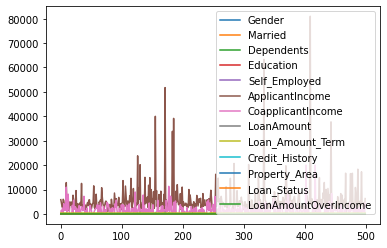

In [186]:
data.plot()
plt.show()

<AxesSubplot: xlabel='ApplicantIncome', ylabel='Loan_Status'>

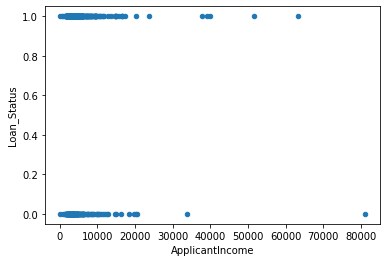

In [187]:
data.plot(kind="scatter",x="ApplicantIncome",y="Loan_Status")

<AxesSubplot: xlabel='LoanAmountOverIncome', ylabel='ApplicantIncome'>

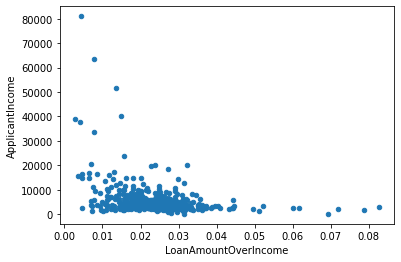

In [188]:
data.plot(kind="scatter",x="LoanAmountOverIncome",y="ApplicantIncome")

array([[<AxesSubplot: title={'center': 'Gender'}>,
        <AxesSubplot: title={'center': 'Married'}>,
        <AxesSubplot: title={'center': 'Dependents'}>,
        <AxesSubplot: title={'center': 'Education'}>],
       [<AxesSubplot: title={'center': 'Self_Employed'}>,
        <AxesSubplot: title={'center': 'ApplicantIncome'}>,
        <AxesSubplot: title={'center': 'CoapplicantIncome'}>,
        <AxesSubplot: title={'center': 'LoanAmount'}>],
       [<AxesSubplot: title={'center': 'Loan_Amount_Term'}>,
        <AxesSubplot: title={'center': 'Credit_History'}>,
        <AxesSubplot: title={'center': 'Property_Area'}>,
        <AxesSubplot: title={'center': 'Loan_Status'}>],
       [<AxesSubplot: title={'center': 'LoanAmountOverIncome'}>,
        <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >]], dtype=object)

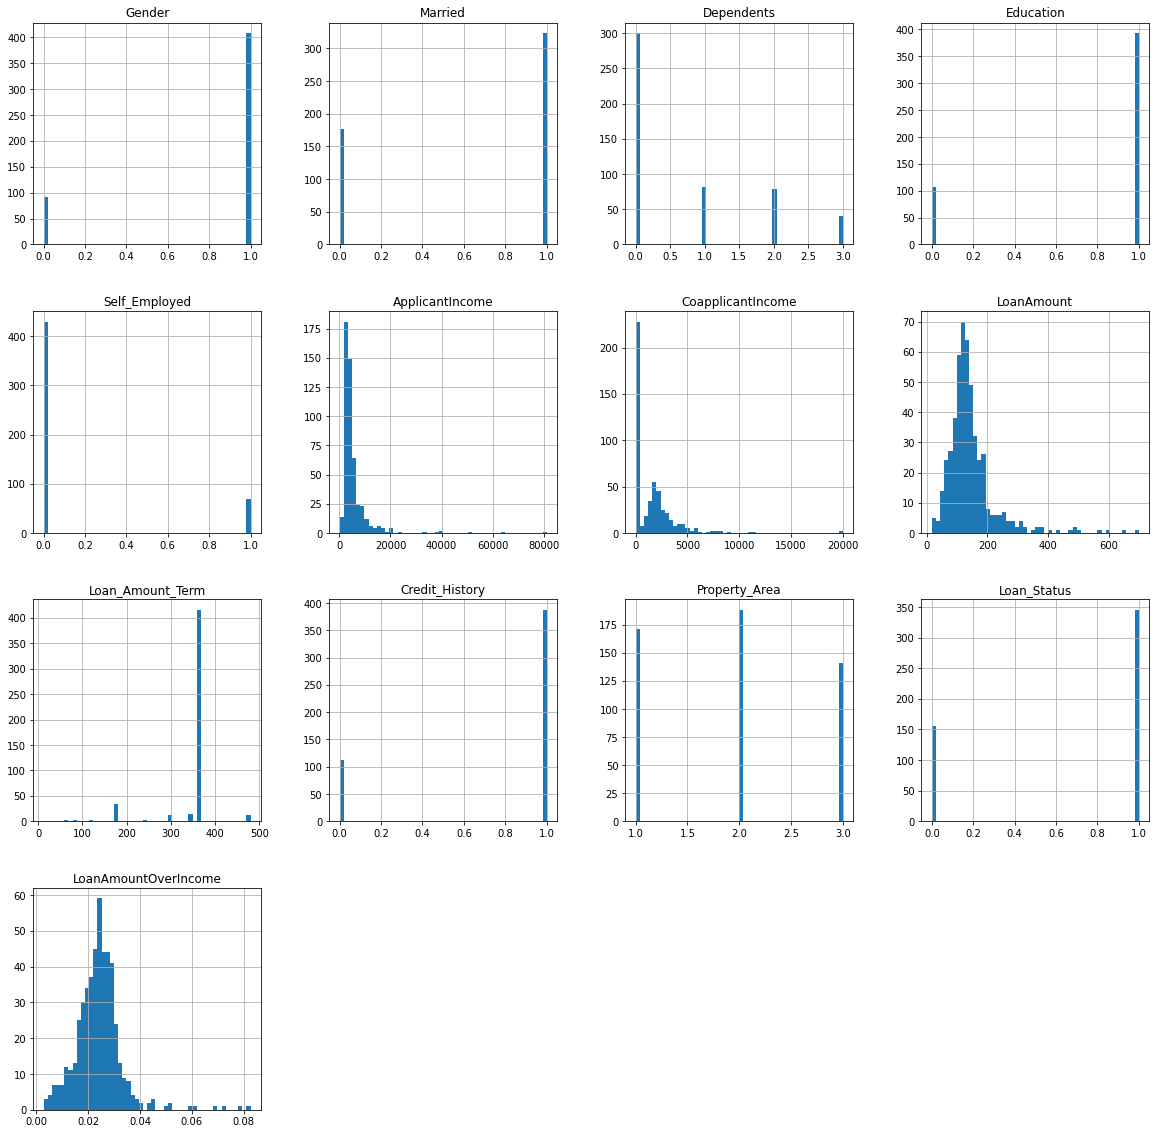

In [189]:
# histrogram plots 
data.hist(bins=50,figsize=(20,20))

In [190]:
data['Total_Income'] = data['ApplicantIncome'] + data['CoapplicantIncome']


In [191]:
data.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmountOverIncome,Total_Income
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.816000,0.646000,0.718000,0.786000,0.140000,5493.644000,1506.306000,144.020000,342.52800,0.774000,1.940000,0.690000,0.023919,6999.950000
std,0.387872,0.478688,1.000238,0.410538,0.347335,6515.668972,2134.432747,80.846099,62.93319,0.418658,0.788444,0.462956,0.009115,6605.760306
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,17.000000,12.00000,0.000000,1.000000,0.000000,0.002734,1442.000000
25%,1.000000,0.000000,0.000000,1.000000,0.000000,2874.500000,0.000000,100.000000,360.00000,1.000000,1.000000,0.000000,0.019058,4166.000000
50%,1.000000,1.000000,0.000000,1.000000,0.000000,3854.000000,1125.500000,128.000000,360.00000,1.000000,2.000000,1.000000,0.024000,5332.500000
75%,1.000000,1.000000,1.000000,1.000000,0.000000,5764.000000,2253.250000,160.000000,360.00000,1.000000,3.000000,1.000000,0.028026,7495.250000
max,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,20000.000000,700.000000,480.00000,1.000000,3.000000,1.000000,0.082712,81000.000000


<AxesSubplot: title={'center': 'Loan Status Bar Plot'}, xlabel='Loan Status Y - Yes or N- No', ylabel='Loan Status Count'>

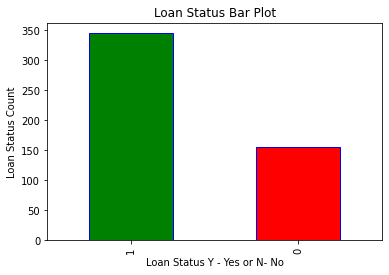

In [192]:
plt.title('Loan Status Bar Plot')
plt.xlabel('Loan Status Y - Yes or N- No')
plt.ylabel('Loan Status Count')

data['Loan_Status'].value_counts().plot.bar(color=['green', 'red'],edgecolor='blue')

In [193]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Gender                500 non-null    int32  
 1   Married               500 non-null    int64  
 2   Dependents            500 non-null    int32  
 3   Education             500 non-null    int64  
 4   Self_Employed         500 non-null    int64  
 5   ApplicantIncome       500 non-null    int32  
 6   CoapplicantIncome     500 non-null    int32  
 7   LoanAmount            500 non-null    int32  
 8   Loan_Amount_Term      500 non-null    int32  
 9   Credit_History        500 non-null    int32  
 10  Property_Area         500 non-null    int64  
 11  Loan_Status           500 non-null    int64  
 12  LoanAmountOverIncome  500 non-null    float64
 13  Total_Income          500 non-null    int32  
dtypes: float64(1), int32(8), int64(5)
memory usage: 39.2 KB


In [194]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.linear_model import BayesianRidge
from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer, MissingIndicator



imputer = IterativeImputer(estimator=BayesianRidge()).fit(data)
dataTrans = imputer.transform(data)
ImpDf = pd.DataFrame(dataTrans, columns=data.columns)

In [195]:
ImpDf

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmountOverIncome,Total_Income
0,1.0,0.0,0.0,1.0,0.0,5849.0,0.0,144.0,360.0,1.0,1.0,1.0,0.024620,5849.0
1,1.0,1.0,1.0,1.0,0.0,4583.0,1508.0,128.0,360.0,1.0,3.0,0.0,0.021015,6091.0
2,1.0,1.0,0.0,1.0,1.0,3000.0,0.0,66.0,360.0,1.0,1.0,1.0,0.022000,3000.0
3,1.0,1.0,0.0,0.0,0.0,2583.0,2358.0,120.0,360.0,1.0,1.0,1.0,0.024287,4941.0
4,1.0,0.0,0.0,1.0,0.0,6000.0,0.0,141.0,360.0,1.0,1.0,1.0,0.023500,6000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.0,1.0,1.0,1.0,0.0,3326.0,913.0,105.0,84.0,1.0,2.0,1.0,0.024770,4239.0
496,1.0,1.0,0.0,0.0,0.0,2600.0,1700.0,107.0,360.0,1.0,3.0,1.0,0.024884,4300.0
497,1.0,1.0,0.0,1.0,0.0,4625.0,2857.0,111.0,12.0,0.0,1.0,1.0,0.014836,7482.0
498,1.0,1.0,1.0,1.0,1.0,2895.0,0.0,95.0,360.0,1.0,2.0,1.0,0.032815,2895.0


In [200]:

# get the locations

# split the dataset
y = ImpDf['Loan_Status']
x = ImpDf.drop('Loan_Status', axis = 1)
# print("Features : ",X)
# print("Label :",y)

In [201]:
train_x = x[:451]
train_y = y[:451]

test_x = x[451:]
test_y = y[451:]

In [202]:
clf = DecisionTreeClassifier()
  
clf.fit(train_x, train_y)

DecisionTreeClassifier()

[Text(0.4356886709601874, 0.9666666666666667, 'Credit_History <= 0.5\ngini = 0.43\nsamples = 451\nvalue = [141, 310]'),
 Text(0.10831381733021077, 0.9, 'LoanAmount <= 547.5\ngini = 0.433\nsamples = 98\nvalue = [67, 31]'),
 Text(0.09894613583138173, 0.8333333333333334, 'ApplicantIncome <= 7983.5\ngini = 0.422\nsamples = 96\nvalue = [67, 29]'),
 Text(0.0895784543325527, 0.7666666666666667, 'Education <= 0.5\ngini = 0.442\nsamples = 88\nvalue = [59, 29]'),
 Text(0.01873536299765808, 0.7, 'ApplicantIncome <= 3266.5\ngini = 0.293\nsamples = 28\nvalue = [23, 5]'),
 Text(0.00936768149882904, 0.6333333333333333, 'gini = 0.0\nsamples = 14\nvalue = [14, 0]'),
 Text(0.02810304449648712, 0.6333333333333333, 'Total_Income <= 4427.5\ngini = 0.459\nsamples = 14\nvalue = [9, 5]'),
 Text(0.01873536299765808, 0.5666666666666667, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.03747072599531616, 0.5666666666666667, 'ApplicantIncome <= 3349.0\ngini = 0.375\nsamples = 12\nvalue = [9, 3]'),
 Text(0.0281

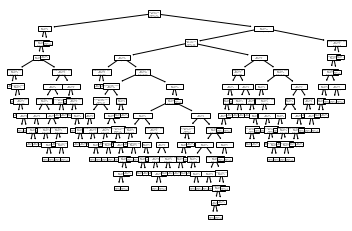

In [204]:
tree.plot_tree(clf, feature_names=list(x))

In [224]:
prediction = clf.predict(test_x)

In [225]:
print(prediction)

[0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 1.
 1. 1. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1.
 1.]


In [227]:
print(prediction == test_y)

451    False
452    False
453     True
454    False
455     True
456    False
457    False
458    False
459    False
460     True
461     True
462     True
463     True
464     True
465     True
466     True
467     True
468    False
469     True
470     True
471     True
472     True
473     True
474     True
475     True
476     True
477     True
478    False
479    False
480    False
481    False
482     True
483     True
484     True
485     True
486     True
487    False
488     True
489    False
490    False
491    False
492     True
493    False
494    False
495    False
496     True
497     True
498     True
499    False
Name: Loan_Status, dtype: bool


In [228]:
scoreListDT = []
scoreListDT.append(clf.score(test_x,test_y))
accuracy = max(scoreListDT)

In [230]:
print(accuracy*100)

59.183673469387756
